In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

month on month inflation rate (consecutive months)
monthly rate can fluctue between pos or neg
exploratory analysis of the dataset
Trend, seasonality, mean, variance
test for stationarity using ADF
ACF and PACF plots


In [30]:
infl=pd.read_csv('us-infl.csv')

In [31]:
infl.count()

Unnamed: 0    180
x             180
dtype: int64

In [32]:
'''
Turn the data into time series data. We don't know the exact dates aside from the fact we are looking at monthly data.
Given that there are 180 line items, we will assume the data begins 180 months from today
'''
infl=pd.Series(infl['x'].values,index=pd.date_range('03/01/2004',periods=180,freq='M'))

In [33]:
infl.head()

2004-03-31    0.44
2004-04-30    0.77
2004-05-31    0.60
2004-06-30   -0.22
2004-07-31   -0.16
Freq: M, dtype: float64

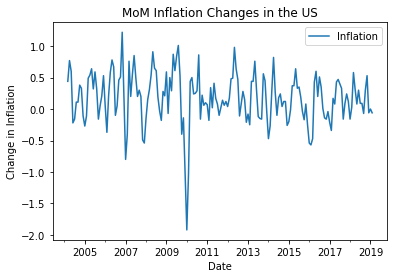

In [34]:
infl.plot()
plt.title('MoM Inflation Changes in the US')
plt.xlabel('Date')
plt.ylabel('Change in Inflation')
plt.legend(['Inflation'])

The above graph shows MoM change in inflation rates in the US. As expected, the data is noisy. At first glance, it looks to me that the data is stationary with constant mean and variance and no distinct trend. There looks to be a seasonal pattern given the intervals between spikes.

In [35]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],
                       index=['Test Statistic','p-value','Lags Used','Number of Observations'])
    
    print(df_output)

In [36]:
stationarity_test(infl)

Test Statistic           -8.599116e+00
p-value                   6.946317e-14
Lags Used                 1.000000e+00
Number of Observations    1.780000e+02
dtype: float64


We can run an Augmented Dicky Fuller Test to check for stationarity. The original hypothesis that the data is in fact stationary appears to be true. We see a p values less than .05 at the 95% confidence level

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

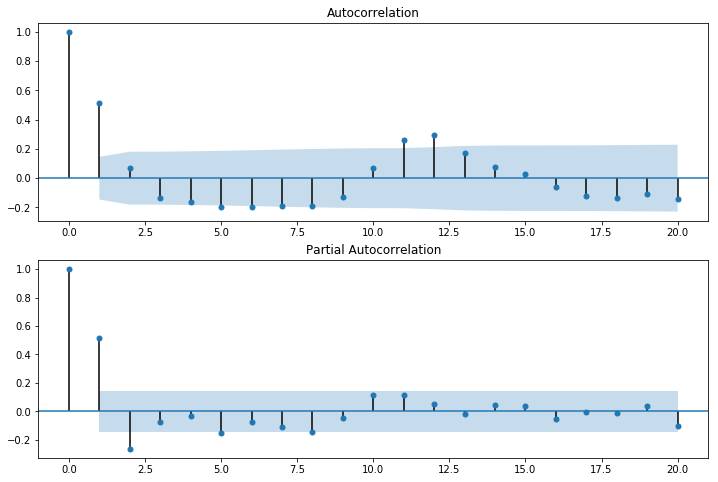

In [40]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(infl,lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(infl,lags=20,ax=ax2)

The above plot checks for autocorrelation and partial autocorrelation. We can see the autocorrelation is confirmed at about 5 lags. For partial autocorrelation, which corrects for previous lags, we see confirmation at 2.5 and extends out until about 8 months. Since the inflation data is monthly, we should probably use 8 lags in the dataset to correct for autocorrelation. 

In [41]:
def plot_rolling(timeseries,window):
    rol_mean=timeseries.rolling(window).mean()
    rol_std=timeseries.rolling(window).std()
    
    
    fig=plt.figure(figsize=(12,8))
    og=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rol_mean,color='red',label='Rolling Mean')
    std=plt.plot(rol_std,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title=("Rolling Mean and Standard Deviation")
    plt.show()

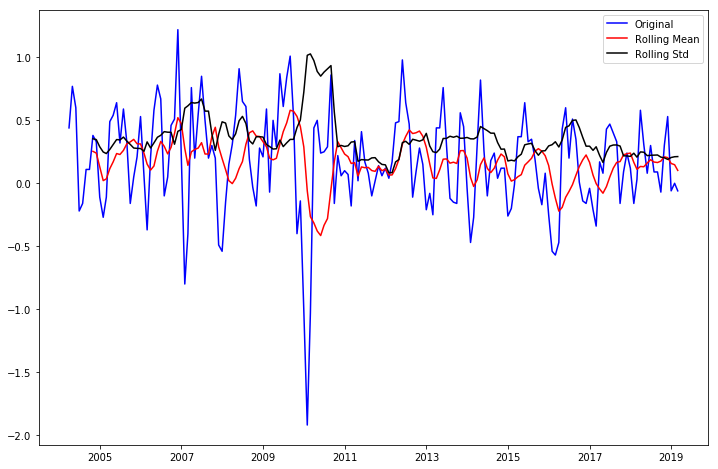

In [45]:
plot_rolling(infl,8)

Now we can plot the data given the PACF test. If we use an 8 month rolling window, we can see the data is smoothed much better.We still see no real significant trend in the data but the seasonaility still appears to show given some of the spikes. 